## SVM Model that classifies image into three categories: Cars, Ice cream cone, and Cricket ball

In [67]:
#Importing all required packages
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

Categories=['Cars','Ice cream cone','Cricket ball']
#Classifying the images in 3 categories namely: cars, cricket ball, ice cream cone

flat_arr=[]
target_arr=[]
dat_dir='C:\Prakriti\Cars\Image-Classification-main'
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(dat_dir,i)
    for img in os.listdir(path):
            #Augmented the data(image) by resizing and falattening the numpy array
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(150,150,3))
            flat_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Cars
loaded category:Cars successfully
loading... category : Ice cream cone
loaded category:Ice cream cone successfully
loading... category : Cricket ball
loaded category:Cricket ball successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,0.718931,0.718931,0.718931,0.723172,0.723172,0.723172,0.726831,0.726831,0.726831,0.729648,...,0.343630,0.324487,0.312722,0.340675,0.321446,0.309681,0.338502,0.319273,0.307508,0
2,0.188032,0.175197,0.166019,0.266747,0.241835,0.178505,0.291546,0.246504,0.177794,0.292808,...,0.596285,0.600187,0.608046,0.605469,0.609391,0.620088,0.587750,0.591672,0.610687,0
3,0.763509,0.694619,0.616188,0.758216,0.691426,0.612994,0.759536,0.692393,0.613961,0.752903,...,0.430610,0.465547,0.454440,0.432553,0.468487,0.464213,0.432538,0.471438,0.474700,0
4,0.264764,0.269562,0.281013,0.283545,0.274633,0.279183,0.117344,0.106521,0.102887,0.067332,...,0.540330,0.515482,0.508428,0.555654,0.537145,0.526144,0.537862,0.519078,0.511778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
96,0.576470,0.658843,0.348981,0.576471,0.658844,0.348980,0.576903,0.659706,0.348552,0.579959,...,0.537094,0.589633,0.289939,0.569548,0.606358,0.315815,0.581344,0.607690,0.320310,2
97,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
98,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2


In [68]:
#Splitting the dataset into 20% testing dataset and 80% training dataset 

x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print("Dataset splitted successfully")

Dataset splitted successfully


In [69]:
#Training the model on splitted dataset
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("Training the model")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('Model is trained')
model.best_params_

Training the model
Model is trained


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [71]:
#Predicting the testing dataset
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1])

In [72]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1])

In [74]:
#Evaluating the performance of SVM model on testing dat
#classification_report(y_pred,y_test)
print("Accuracy score on testing data:",model.score(x_test,y_test))
print("Accuracy score on training data is:",model.score(x_train,y_train))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

Accuracy score on testing data: 0.9
Accuracy score on training data is: 1.0
The model is 90.0% accurate


In [76]:
#Computing the classification metrics on augmented dataset
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      0.83      0.91         6
           2       0.75      1.00      0.86         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.93      0.90      0.90        20



Enter urlhttps://images.fineartamerica.com/images/artworkimages/mediumlarge/2/chocolate-ice-cream-cone-duckycards.jpg


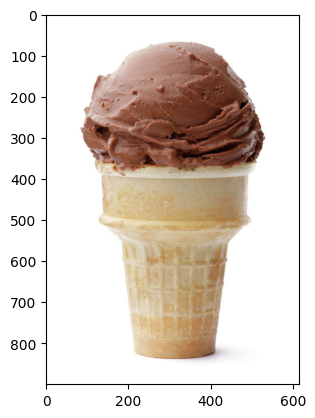

Cars = 2.211726229839965%
Ice cream cone = 94.10074018196471%
Cricket ball = 3.687533588195354%
The predicted image is : Ice cream cone


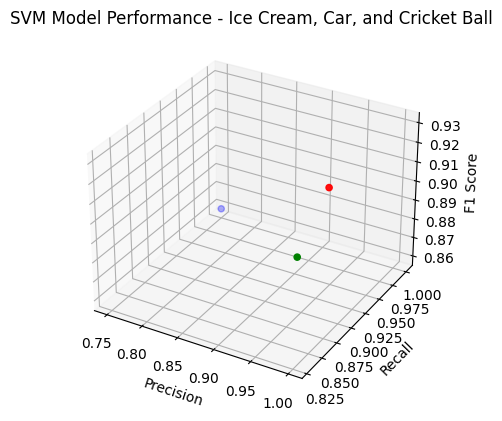

In [108]:
#Testing our Model on an image and develop 3D illustration of model

pickle.dump(model,open('img_model.p','wb'))
model=pickle.load(open('img_model.p','rb'))
import urllib.request
from PIL import Image
url=input("Enter url")  
urllib.request.urlretrieve(url, "gfg.png")
img = numpy.array(Image.open("gfg.png"))
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])


#Developing 3D illustration of results(Precision,recall,F1 score)
#obtained from svm model

from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Example performance metrics for three classes
ice_cream_metrics = [1.0, 0.88, 0.93]  # Precision, recall, F1 score
car_metrics = [1.0, 0.83, 0.91]
cricket_ball_metrics = [0.75, 1.0, 0.86]

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define x, y, and z coordinates for each class
x_coords = [ice_cream_metrics[0], car_metrics[0], cricket_ball_metrics[0]]
y_coords = [ice_cream_metrics[1], car_metrics[1], cricket_ball_metrics[1]]
z_coords = [ice_cream_metrics[2], car_metrics[2], cricket_ball_metrics[2]]

# Define colors for each point
colors = ['r', 'g', 'b']

# Plot scatter points
ax.scatter(x_coords, y_coords, z_coords, c=colors, marker='o')

# Add labels and title
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_zlabel('F1 Score')
ax.set_title('SVM Model Performance - Ice Cream, Car, and Cricket Ball')

# Save and Show plot
plt.savefig('3dplot.jpeg', dpi=300)

plt.show()

The SVM model developed here performs image classification in three categories: cars, ice cream cone and cricket ball with accuracy of 90%. It has high accuracy score overall and good precision.